In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import missingno as missing
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score ,auc, plot_roc_curve
from sklearn import svm
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
#read the file
df = pd.read_csv("b_depressed.csv")

In [4]:
#see shape
df.shape

(1429, 23)

In [5]:
#display the length
print(len(df))

1429


In [6]:
#Shoe mean median mode std dev of the data frame
print("Describe Data")
print(df.describe())

Describe Data
        Survey_id     Ville_id          sex          Age      Married  \
count  1429.00000  1429.000000  1429.000000  1429.000000  1429.000000   
mean    715.00000    76.286214     0.918125    34.777467     0.772568   
std     412.66108    66.444012     0.274271    13.986219     0.419320   
min       1.00000     1.000000     0.000000    17.000000     0.000000   
25%     358.00000    24.000000     1.000000    25.000000     1.000000   
50%     715.00000    57.000000     1.000000    30.000000     1.000000   
75%    1072.00000   105.000000     1.000000    42.000000     1.000000   
max    1429.00000   292.000000     1.000000    91.000000     1.000000   

       Number_children  education_level  total_members  gained_asset  \
count      1429.000000      1429.000000    1429.000000  1.429000e+03   
mean          2.883135         8.687194       4.969209  3.363448e+07   
std           1.874472         2.923532       1.786317  2.003854e+07   
min           0.000000         1.000000 

In [7]:
#dropp nulls
df_1 = df.dropna()

#drop irrelevent columns
df_2 = df_1.drop(['Survey_id'], axis=1)
dfDrop = df.drop(['no_lasting_investmen', 'Survey_id', 'Ville_id', 'gained_asset', 'durable_asset', 'save_asset', 'farm_expenses', 'labor_primary', 'Number_children','lasting_investment','incoming_agricultural'], axis=1)

#convert catagorical data into indicator variables
df_3 = pd.get_dummies(df_2, columns=['Ville_id', 'education_level'])
df_3.head()

,sex,Age,Married,Number_children,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,...,education_level_9,education_level_10,education_level_11,education_level_12,education_level_13,education_level_14,education_level_16,education_level_17,education_level_18,education_level_19
0,1,28,1,4,5,28912201,22861940,23399979,26692283,28203066,...,0,1,0,0,0,0,0,0,0,0
1,1,23,1,3,5,28912201,22861940,23399979,26692283,28203066,...,0,0,0,0,0,0,0,0,0,0
2,1,22,1,3,5,28912201,22861940,23399979,26692283,28203066,...,1,0,0,0,0,0,0,0,0,0
3,1,27,1,2,4,52667108,19698904,49647648,397715,44042267,...,0,1,0,0,0,0,0,0,0,0
4,0,59,0,4,6,82606287,17352654,23399979,80877619,74503502,...,0,1,0,0,0,0,0,0,0,0


In [8]:
#not great correlation but had to give it a try incase
df['incoming_salary'].corr(df['depressed'])

-0.0039288654979214984

In [9]:
#count for respective columnes
df.count()

Survey_id                1429
Ville_id                 1429
sex                      1429
Age                      1429
Married                  1429
Number_children          1429
education_level          1429
total_members            1429
gained_asset             1429
durable_asset            1429
save_asset               1429
living_expenses          1429
other_expenses           1429
incoming_salary          1429
incoming_own_farm        1429
incoming_business        1429
incoming_no_business     1429
incoming_agricultural    1429
farm_expenses            1429
labor_primary            1429
lasting_investment       1429
no_lasting_investmen     1409
depressed                1429
dtype: int64

In [10]:
df.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

(array([1191.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         238.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

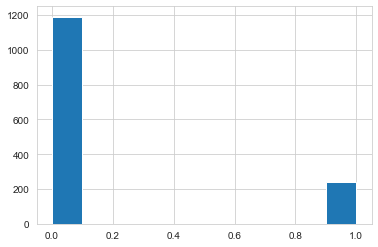

In [11]:
#0 = not depressed, 1 = depressed
plt.hist(df['depressed'])

In [12]:

df2=df[df['depressed']==1]

(array([  0.,   0.,   0.,   0.,   0., 238.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

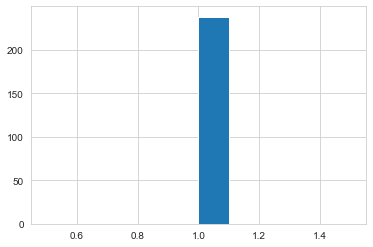

In [13]:
#0 = not depressed, 1 = depressed
plt.hist(df2['depressed'])

In [14]:
#find the means 
print(df['incoming_salary'].mean())
print(df2['incoming_salary'].mean())
print(df['Age'].mean())
print(df2['Age'].mean())
print(df['education_level'].mean())
print(df2['education_level'].mean())
print(df['Number_children'].mean())
print(df2['Number_children'].mean())
print(df['lasting_investment'].mean())
print(df2['lasting_investment'].mean())

0.17984604618614417
0.17647058823529413
34.77746675997201
38.08403361344538
8.687193841847446
8.046218487394958
2.8831350594821554
2.899159663865546
32992215.081875436
33188447.50420168


(array([ 20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 218.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

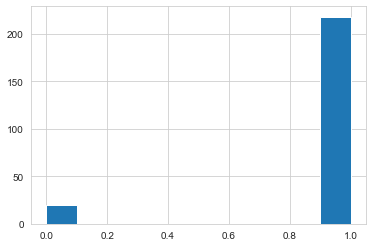

In [15]:
#0=male 1 = female
plt.hist(df2['sex'])

/Users/juge/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/juge/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/juge/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

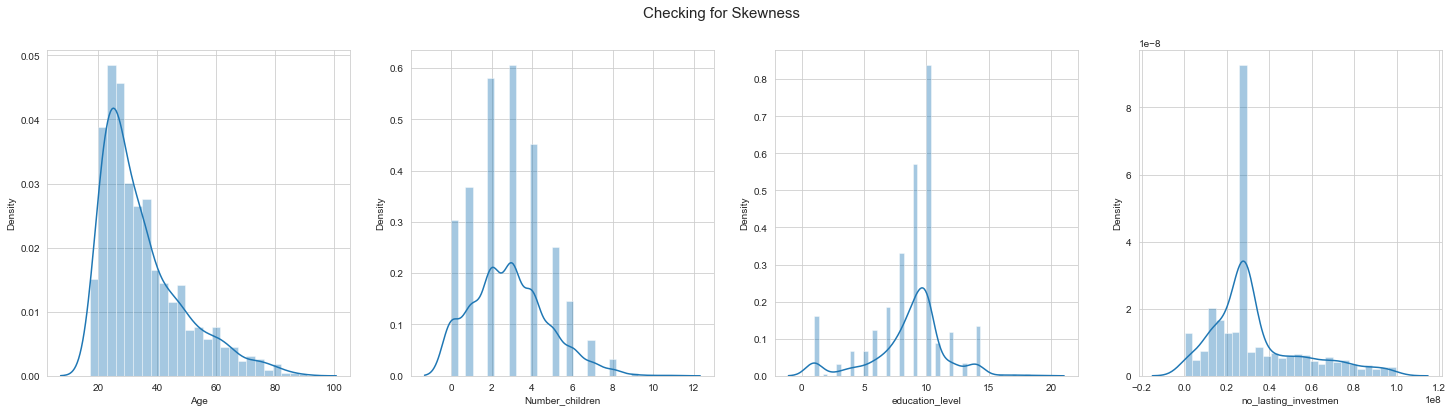

In [16]:
#check for skewness for relative data
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.distplot(df['Age'])

plt.subplot(1, 4, 2)
sns.distplot(df['Number_children'])

plt.subplot(1, 4, 3)
sns.distplot(df['education_level'])

plt.subplot(1, 4, 4)
sns.distplot(df['no_lasting_investmen'])

plt.suptitle('Checking for Skewness', fontsize = 15)
plt.show()

/Users/juge/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/juge/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/juge/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

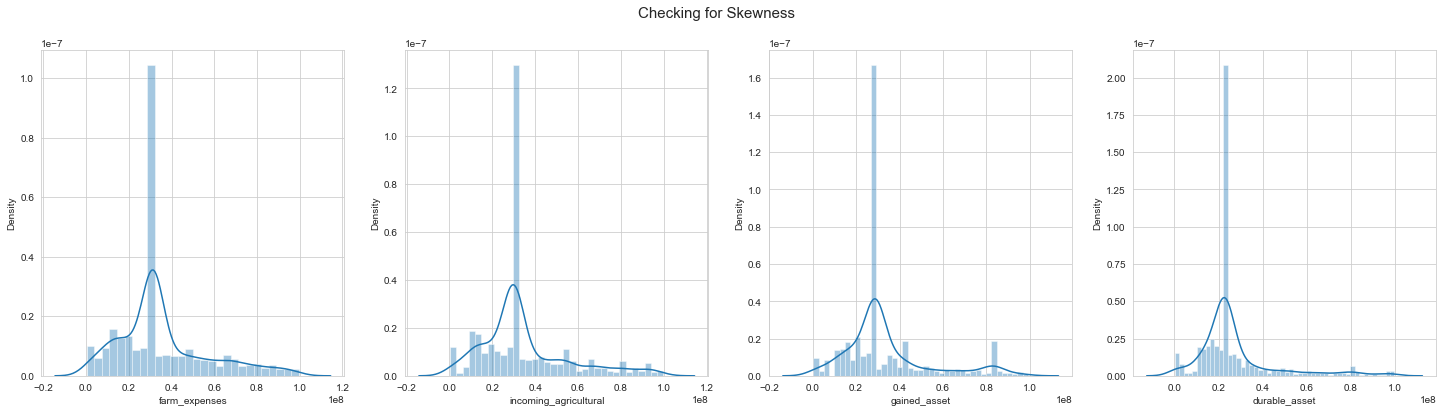

In [17]:

plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.distplot(df['farm_expenses'])

plt.subplot(1, 4, 2)
sns.distplot(df['incoming_agricultural'])

plt.subplot(1, 4, 3)
sns.distplot(df['gained_asset'])

plt.subplot(1, 4, 4)
sns.distplot(df['durable_asset'])

plt.suptitle('Checking for Skewness', fontsize = 15)
plt.show()

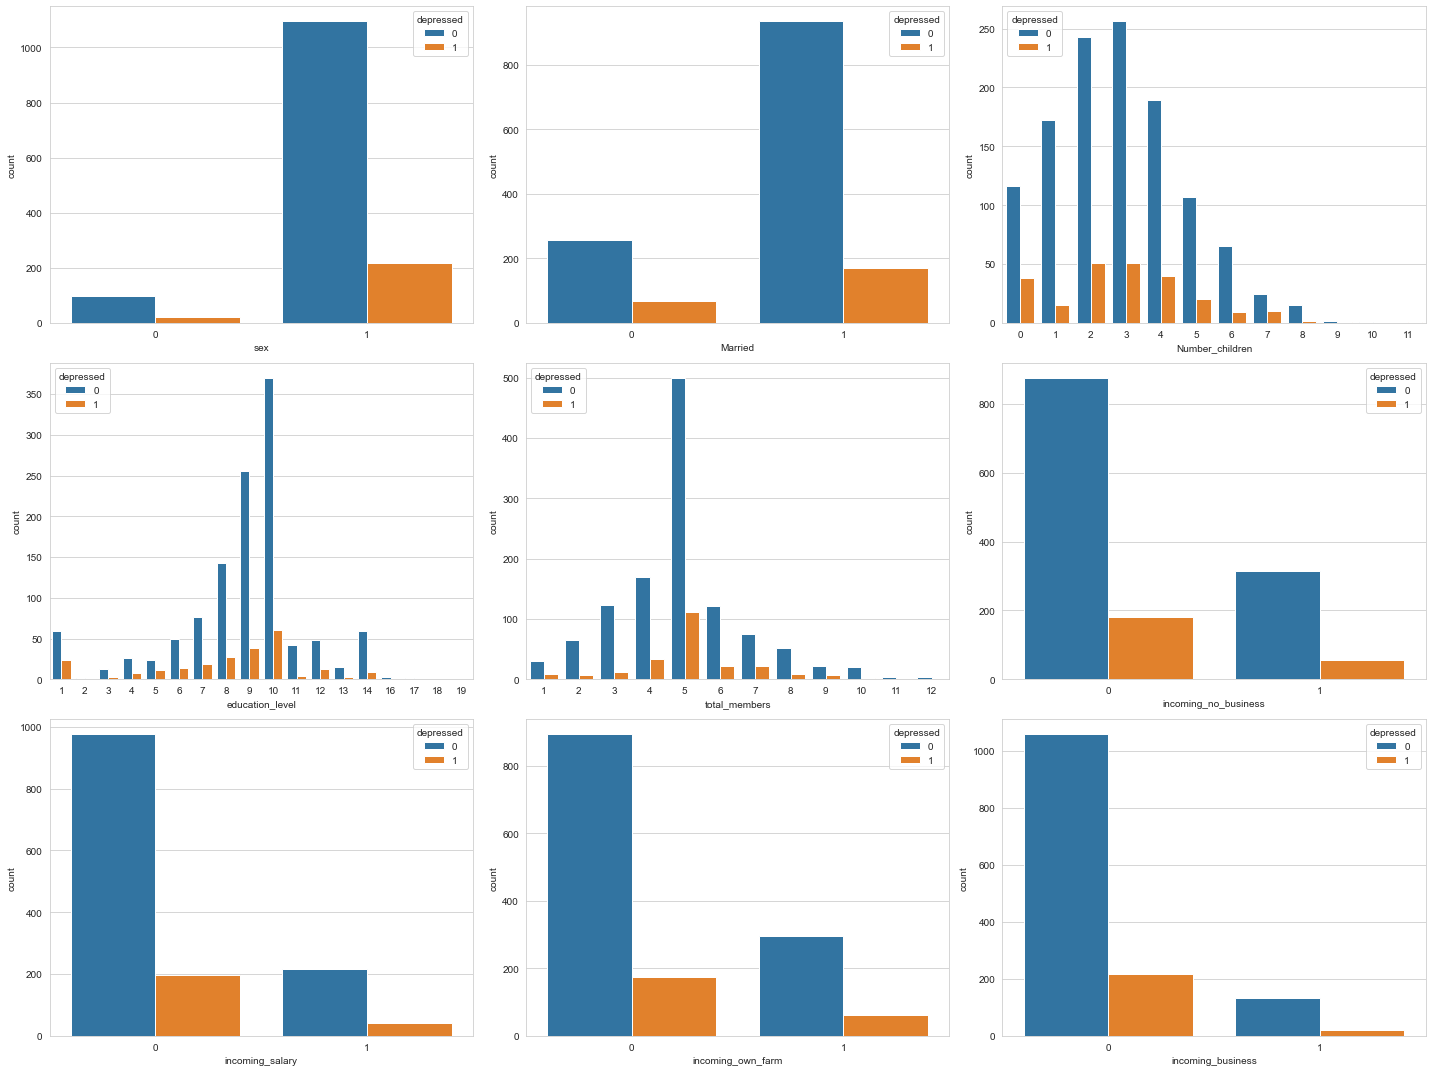

In [18]:
#personal info against depressed
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x='sex', hue='depressed', data=df)
plt.subplot(3,3,2)
sns.countplot(x='Married', hue='depressed', data=df)
plt.subplot(3,3,3)
sns.countplot(x='Number_children', hue='depressed', data=df)

plt.subplot(3,3,4)
sns.countplot(x='education_level', hue='depressed', data=df)
plt.subplot(3,3,5)
sns.countplot(x='total_members', hue='depressed', data=df)
plt.subplot(3,3,6)
sns.countplot(x='incoming_no_business', hue='depressed', data=df)

plt.subplot(3,3,7)
sns.countplot(x='incoming_salary', hue='depressed', data=df)
plt.subplot(3,3,8)
sns.countplot(x='incoming_own_farm', hue='depressed', data=df)
plt.subplot(3,3,9)
sns.countplot(x='incoming_business', hue='depressed', data=df)

plt.tight_layout()
plt.show()


<Figure size 1800x432 with 0 Axes>

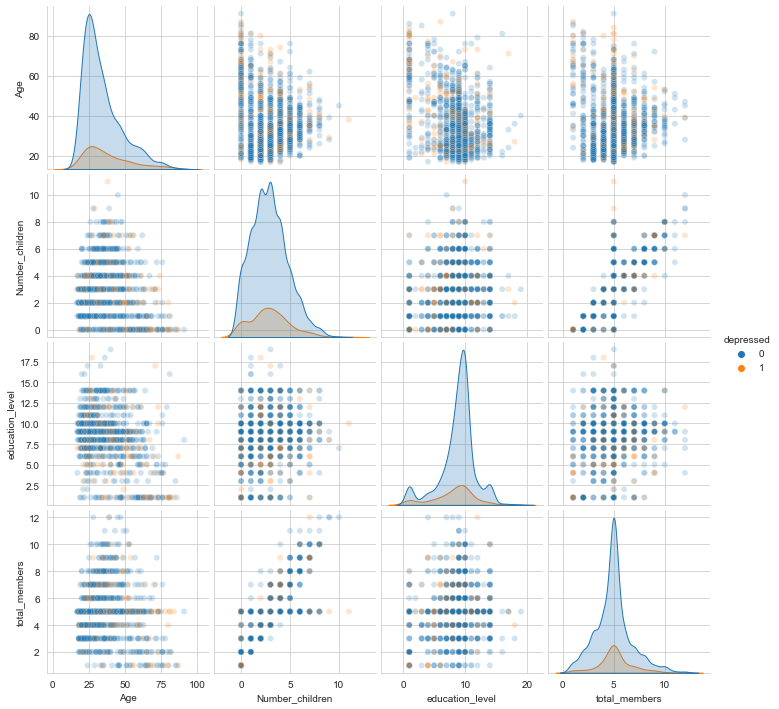

In [19]:
#same but new drops
dfPairplot = df.drop(['Survey_id' , 'Married' , 'Ville_id' , 'sex'  , 'gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

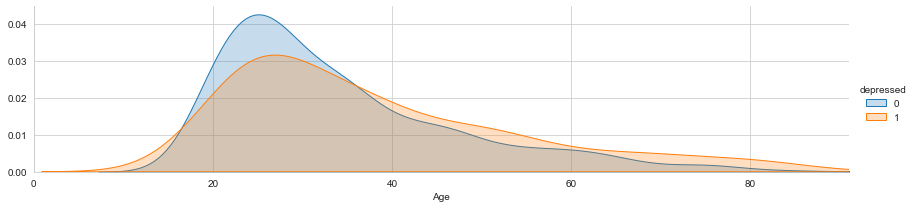

In [20]:
#Age vs Depression
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()

plt.show()

In [21]:
#Incoming agriculteral vs depressed

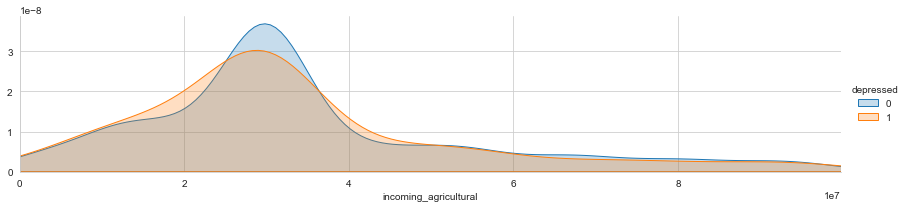

In [22]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'incoming_agricultural', shade=True)
facet.set(xlim=(0,df['incoming_agricultural'].max()))
facet.add_legend()

plt.show()

In [23]:
dfCorr = df.drop(['no_lasting_investmen'], axis=1)

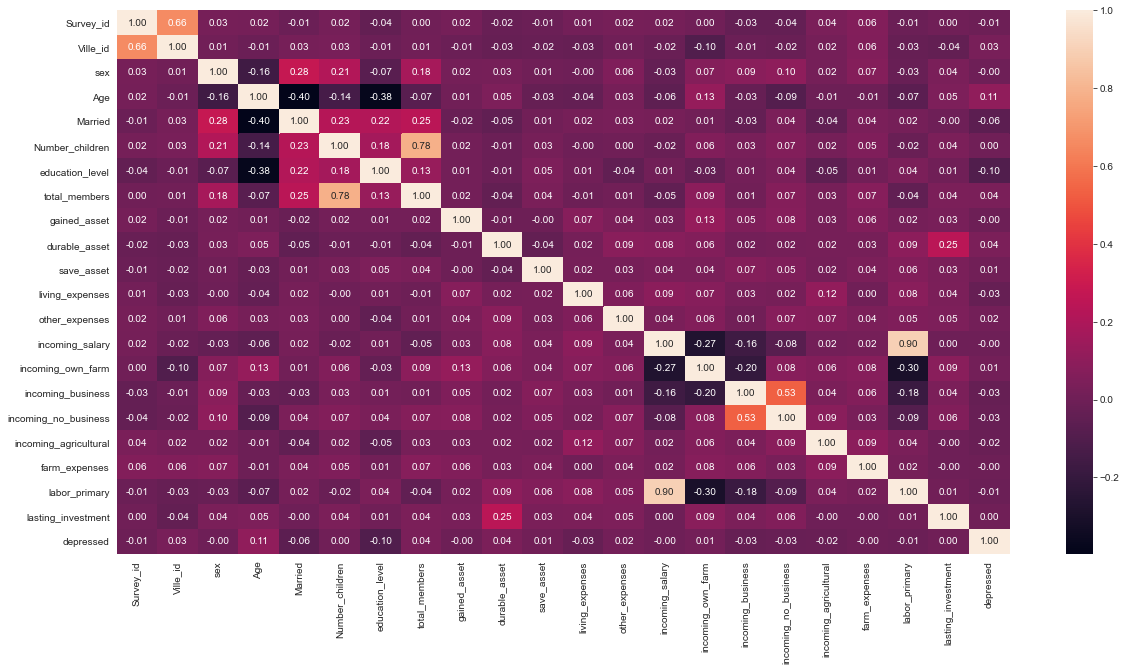

In [24]:
#correlation heat map
plt.subplots(figsize=(20,10)) 
sns.heatmap(dfCorr.corr(), annot = True, fmt = ".2f")
plt.show()

In [25]:
#Function os for drawing a learning curve Learning curve is a measurement 
#to check how well the model learns. This is measured by taking a reading of 
#the accuracy of the algorithm as it trains and also while it is testing.
#This are plotting to see the convergence.

def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b" ,label="Training Error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r" ,label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Data Size', fontsize = 14)
    plt.ylabel('Error', fontsize = 14)
    plt.tight_layout()

In [26]:
#validation curve, Cross validation is a measure of how well our model can generalize 
#from what it learns. How well will it perform with data it has neven seen before.
#This is done by saving part of the data to later predict and measure the accuracy. 
#The training data is split with differing testing folds to be used. Default in this case is k=5 folds.

def plotValidationCurves(X_train, y_train, classifier, param_name, param_range, title):
    train_scores, test_scores = validation_curve(
        classifier, X_train, y_train, param_name = param_name, param_range = param_range,
        cv=5, scoring="accuracy")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_scores_mean, 'o-', color="b" ,label="Training Error")
    plt.plot(param_range, test_scores_mean, 'o-', color="r" ,label="Cross Validation Error")

    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Complexity', fontsize = 14)
    plt.ylabel('Error', fontsize = 14)
    plt.tight_layout()

In [1]:
pwd

'/Users/juge/jupyter'

In [27]:
#Confusion matrix: The confusion matrix shows the frequency for 
#True Positives, True Negatives, False Positives, and False Negative.
#Also a summary of the different properties can be presented here, along with the accuracy
#for predicted values.

def printConfusionMatrix(y_train, pred):
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("Classification Report:",)
    print (classification_report(y_test, pred))
    print("Accuracy:", accuracy_score(y_test, pred))

In [28]:
X = dfDrop.iloc[:, :-1].values
y = dfDrop.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
rf = RandomForestClassifier(n_estimators = 9,
                                    max_depth=3,
                                    min_samples_split=9,
                                    min_samples_leaf=5
                                   )
rf.fit(X_train, y_train)
rf_pred1 = rf.predict(X_test)

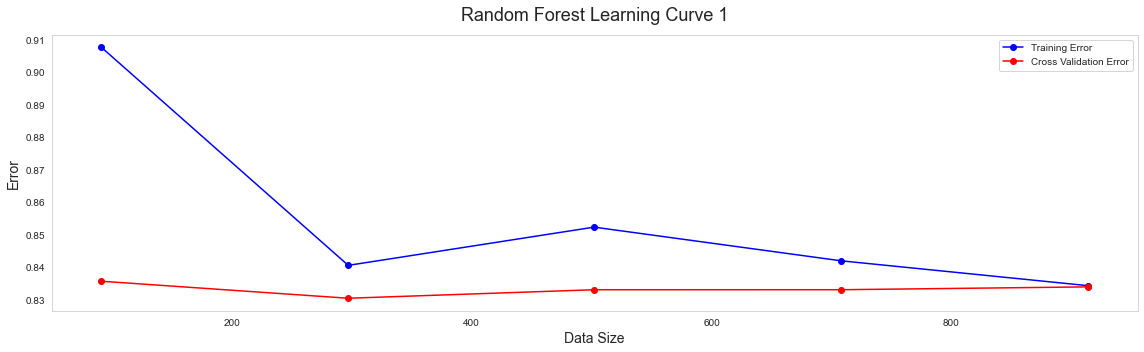

In [30]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 1'
plotLearningCurves(X_train, y_train, rf, title)

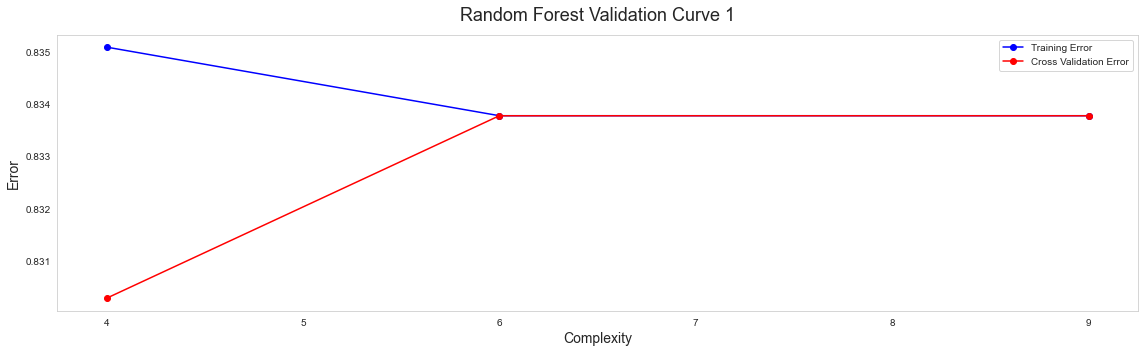

In [31]:
title = 'Random Forest Validation Curve 1'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)

In [32]:
printConfusionMatrix(y_test, rf_pred1)

Confusion Matrix:
[[238   0]
 [ 48   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       238
           1       0.00      0.00      0.00        48

    accuracy                           0.83       286
   macro avg       0.42      0.50      0.45       286
weighted avg       0.69      0.83      0.76       286

Accuracy: 0.8321678321678322


/Users/juge/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


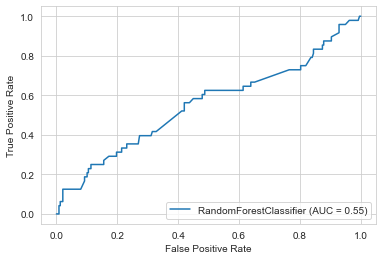

In [33]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

In [34]:
Classifier = RandomForestClassifier()
grid_obj = GridSearchCV(Classifier,
                        {'n_estimators': [4, 6, 9],
                         'max_features': ['log2', 'sqrt','auto'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 8],
                         'min_samples_split': [2, 5, 8, 10],
                         'min_samples_leaf': [1, 3, 5]
                        },
                        scoring=make_scorer(accuracy_score))
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
Classifier.fit(X_train, y_train)

predictions = Classifier.predict(X_test)

print("Best Params: " , grid_obj.best_estimator_)
print("Best Score: " , grid_obj.best_score_)

Best Params:  RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=9)
Best Score:  0.8355205699839118


In [35]:
#KNN model
X = dfDrop.iloc[:, :-1].values
y = dfDrop.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
#Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred1=knn.predict(X_test)

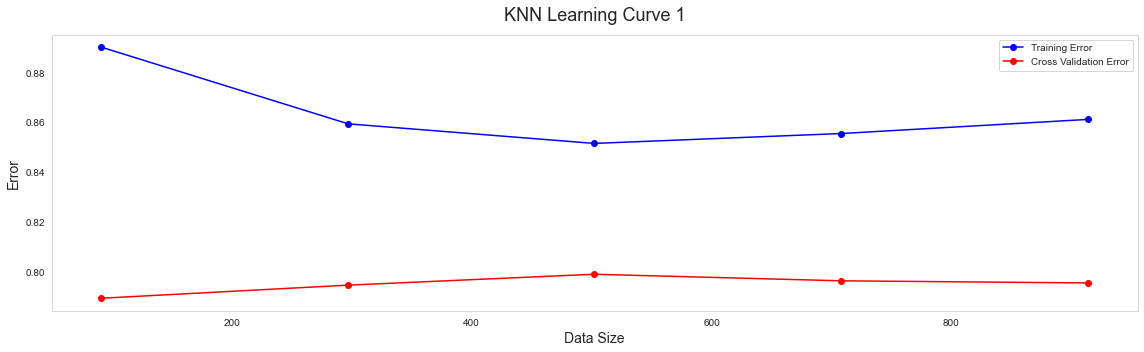

In [38]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 1'
plotLearningCurves(X_train,y_train,knn,title)

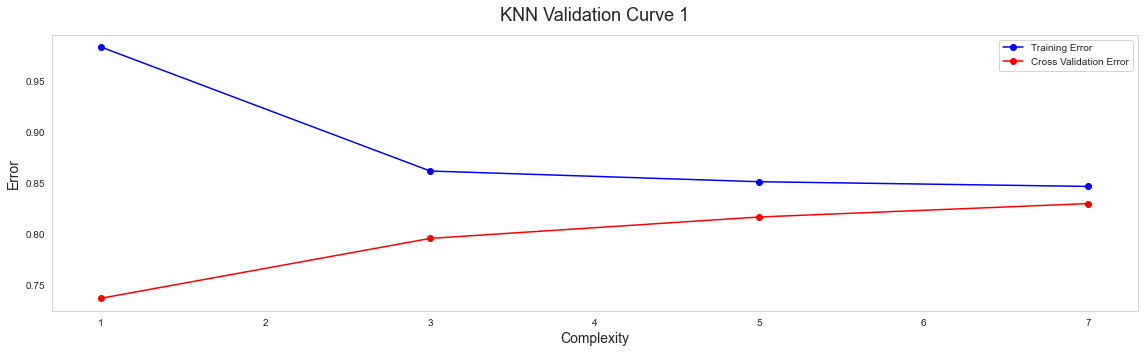

In [39]:
title = 'KNN Validation Curve 1' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [40]:
printConfusionMatrix(y_test, knn_pred1)

Confusion Matrix:
[[219  10]
 [ 54   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       229
           1       0.23      0.05      0.09        57

    accuracy                           0.78       286
   macro avg       0.52      0.50      0.48       286
weighted avg       0.69      0.78      0.72       286

Accuracy: 0.7762237762237763


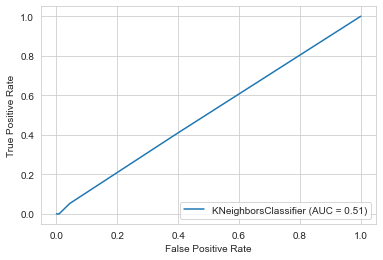

In [41]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [42]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=7)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred2=knn.predict(X_test)

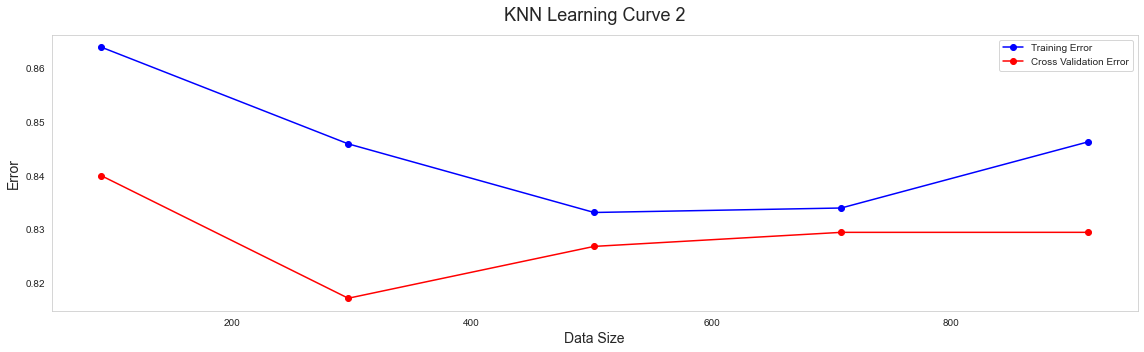

In [43]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 2'
plotLearningCurves(X_train,y_train,knn,title)

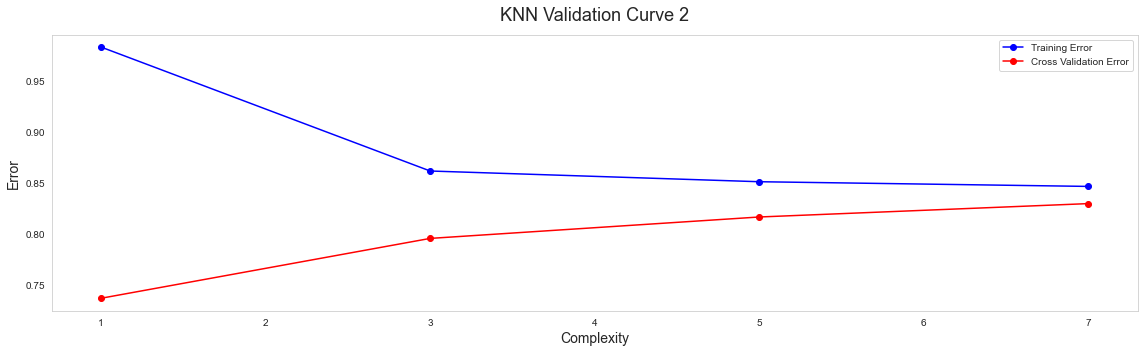

In [44]:
title = 'KNN Validation Curve 2' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [45]:
printConfusionMatrix(y_test, knn_pred2)

Confusion Matrix:
[[225   4]
 [ 55   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       229
           1       0.33      0.04      0.06        57

    accuracy                           0.79       286
   macro avg       0.57      0.51      0.47       286
weighted avg       0.71      0.79      0.72       286

Accuracy: 0.7937062937062938


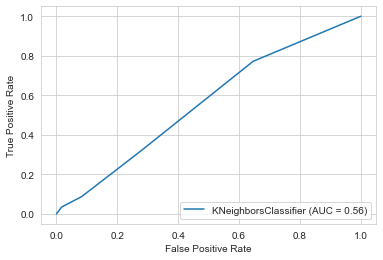

In [46]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [47]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=10)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred3=knn.predict(X_test)

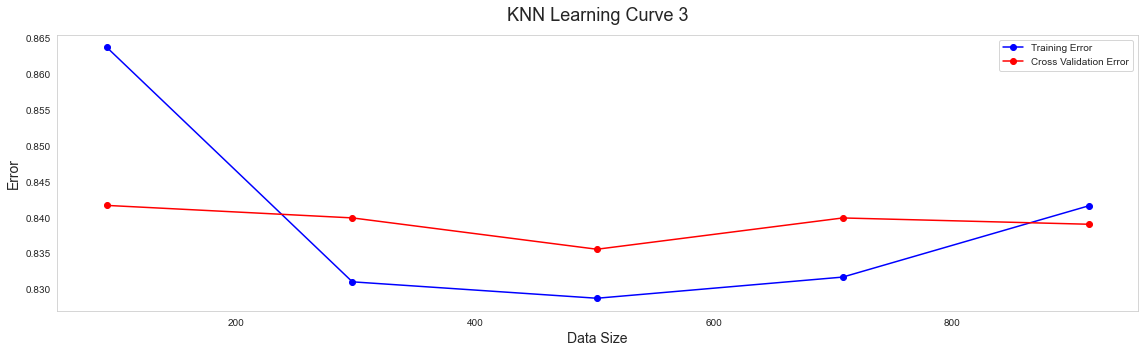

In [48]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 3'
plotLearningCurves(X_train,y_train,knn,title)

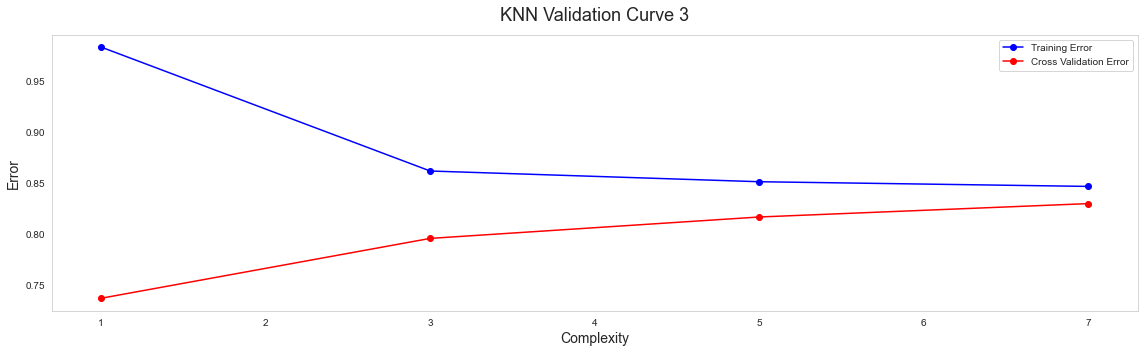

In [49]:
title = 'KNN Validation Curve 3' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [50]:
printConfusionMatrix(y_test, knn_pred3)

Confusion Matrix:
[[229   0]
 [ 57   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       229
           1       0.00      0.00      0.00        57

    accuracy                           0.80       286
   macro avg       0.40      0.50      0.44       286
weighted avg       0.64      0.80      0.71       286

Accuracy: 0.8006993006993007


/Users/juge/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


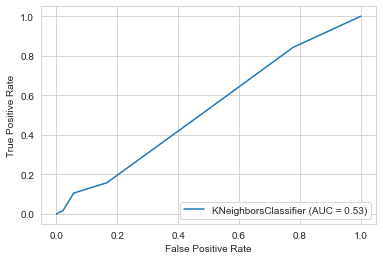

In [51]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [52]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=20)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred4=knn.predict(X_test)

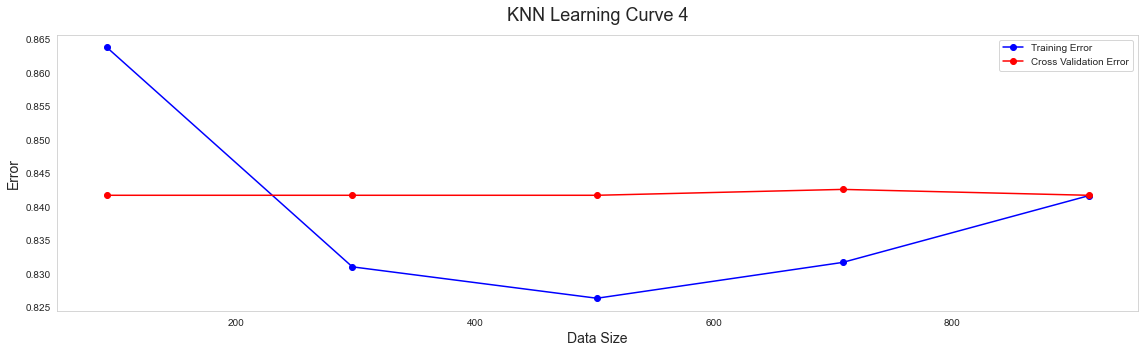

In [53]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 4'
plotLearningCurves(X_train,y_train,knn,title)

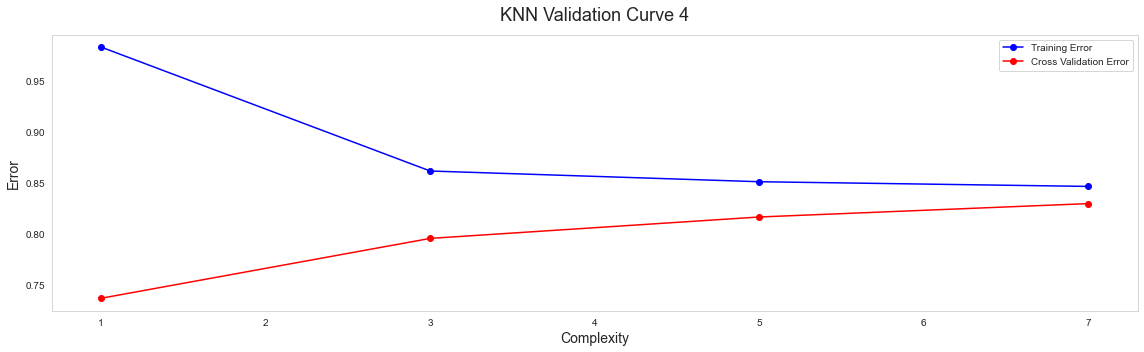

In [54]:
title = 'KNN Validation Curve 4' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [55]:
printConfusionMatrix(y_test, knn_pred4)

Confusion Matrix:
[[229   0]
 [ 57   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       229
           1       0.00      0.00      0.00        57

    accuracy                           0.80       286
   macro avg       0.40      0.50      0.44       286
weighted avg       0.64      0.80      0.71       286

Accuracy: 0.8006993006993007


/Users/juge/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
#create new a knn model
knn2=KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid= {'n_neighbors': np.arange(1, 20)}
#use gridsearch to test all values for n_neighbors
knn_gscv=GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

print("Best Params: " , knn_gscv.best_estimator_)
print("Best Score: " , knn_gscv.best_score_)

Best Params:  KNeighborsClassifier(n_neighbors=10)
Best Score:  0.8341504109925163


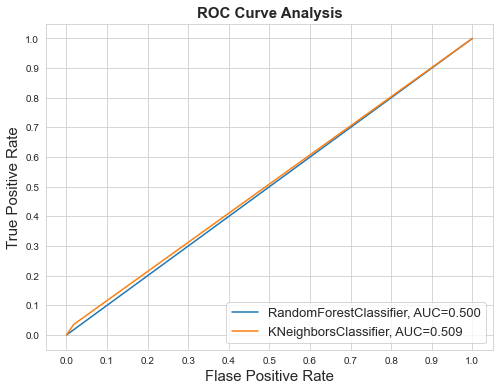

In [59]:
# Instantiate the classfiers and make a list
classifiers = [RandomForestClassifier(),
               KNeighborsClassifier()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


# print('auc =', auc)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, rf_pred1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test,  knn_pred2)

# fpr , tpr, _= roc_curve(X_test, predict6_test)
auc1 = roc_auc_score(y_test, rf_pred1)
auc2 = roc_auc_score(y_test,  knn_pred2)
 
    
result_table = result_table.append({'classifiers':RandomForestClassifier.__class__.__name__,
                                     'fpr':lr_fpr1, 
                                     'tpr':lr_tpr1, 
                                     'auc':auc1}, ignore_index=True)

result_table = result_table.append({'classifiers':KNeighborsClassifier.__class__.__name__,
                                     'fpr':lr_fpr2, 
                                     'tpr':lr_tpr2, 
                                     'auc':auc2}, ignore_index=True)


fig = plt.figure(figsize=(8,6))

plt.plot(result_table.loc[0]['fpr'], 
         result_table.loc[0]['tpr'], 
         label="RandomForestClassifier, AUC={:.3f}".format( result_table.loc[0]['auc']))

plt.plot(result_table.loc[1]['fpr'], 
         result_table.loc[1]['tpr'], 
         label="KNeighborsClassifier, AUC={:.3f}".format( result_table.loc[1]['auc']))


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
    

ModuleNotFoundError: No module named 'autosklearn'